In [1]:
import numpy as np

from pytopo.qctools.dataset2 import do_experiment, select_experiment
from qcodes.sweep import sweep
from qcodes import Parameter, Instrument

In [2]:
class Function(Instrument): 
    def __init__(self, func): 
        super().__init__(func.__name__)
        self._func = func
        self._internal_state = None
    
        self.add_parameter(
            "x", 
            set_cmd=self._set_state
        )
    
        self.add_parameter(
            "y", 
            get_cmd=lambda: self._func(self._internal_state)
        )
    
    def _set_state(self, value): 
        self._internal_state = value
        

In [3]:
def f(x): 
    return np.exp(-x**2) * np.sin(7*x)

d = Function(f)

def setup(): 
    print("setting up")

def cleanup(): 
    print("cleaning up")

exp = select_experiment("test", "test_sample")
    
data = do_experiment(
    [setup], 
    sweep(d.x, np.linspace(-3, 3, 100))(d.y), 
    [cleanup], 
    experiment=exp
)

setting up
Starting experimental run with id: 15
cleaning up


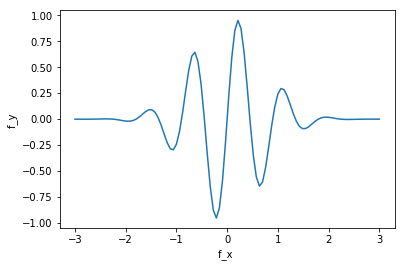

In [4]:
data.plot()

In [5]:
d = data["f_x"]
x = d["f_x"]
y = d["f_y"]